In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/ibm/forest fire

/content/drive/MyDrive/ibm/forest fire


In [ ]:
!unzip archive.zip

Archive:  archive.zip
  inflating: Dataset/Dataset/test_set/forest/0.48007200_1530881924_final_forest.jpg  
  inflating: Dataset/Dataset/test_set/forest/0.64133000_1519374442_forest_deep.jpg  
  inflating: Dataset/Dataset/test_set/forest/0.72918000_1559733279_forests1_gettyimages_.jpg  
  inflating: Dataset/Dataset/test_set/forest/0.98884800_1554454572_spin.jpg  
  inflating: Dataset/Dataset/test_set/forest/01_NeilBurnell_Mystical_photoverticall.jpg  
  inflating: Dataset/Dataset/test_set/forest/091318_LH_forest_loss_main_FREE.jpg  
  inflating: Dataset/Dataset/test_set/forest/1009821.jpg  
  inflating: Dataset/Dataset/test_set/forest/111188170_river_in_the_mountain_forest.jpg  
  inflating: Dataset/Dataset/test_set/forest/1170x500_Ireland_web.jpg  
  inflating: Dataset/Dataset/test_set/forest/1200px_Mountainarea.jpg  
  inflating: Dataset/Dataset/test_set/forest/146019.jpg  
  inflating: Dataset/Dataset/test_set/forest/1506697583544.jpg  
  inflating: Dataset/Dataset/test_set/forest/1

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 rotation_range=180,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
x_train =train_datagen.flow_from_directory(r'/content/drive/MyDrive/ibm/forest fire/Dataset/Dataset/train_set',
                                         target_size = (128 ,128),
                                         batch_size = 32 ,
                                         class_mode = 'binary')
                                  

Found 436 images belonging to 2 classes.


In [ ]:
x_test = test_datagen.flow_from_directory(r'/content/drive/MyDrive/ibm/forest fire/Dataset/Dataset/test_set',
                                          target_size = (128 ,128),
                                          batch_size = 32 ,
                                          class_mode = 'binary')

Found 121 images belonging to 2 classes.


Model Building

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#initialize the model
model=Sequential()

In [ ]:
from keras.layers.pooling.max_pooling2d import MaxPooling2D
#add convolution layer
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
#add maxpooling layer
model.add(MaxPooling2D(pool_size=(2,2)))
#add flatten layer
model.add(Flatten())

In [ ]:
#add hidden layer
model.add(Dense(150,activation='relu'))
#add output layer
model.add(Dense(1,activation='sigmoid'))

In [ ]:
#configure the learning process
model.compile(loss = 'binary_crossentropy',
              optimizer = "adam",
              metrics = ["accuracy"])

In [ ]:
#training the model
model.fit(x_train,steps_per_epoch=14,
                    epochs=10,validation_data=x_test,
                    validation_steps=4)

Epoch 1/10
14/14 [==============================] - 32s 2s/step - loss: 6.6102 - accuracy: 0.5413 - val_loss: 0.6909 - val_accuracy: 0.6281
Epoch 2/10
14/14 [==============================] - 30s 2s/step - loss: 0.6504 - accuracy: 0.6972 - val_loss: 0.2128 - val_accuracy: 0.9256
Epoch 3/10
14/14 [==============================] - 28s 2s/step - loss: 0.3389 - accuracy: 0.8349 - val_loss: 0.1659 - val_accuracy: 0.9339
Epoch 4/10
14/14 [==============================] - 26s 2s/step - loss: 0.2783 - accuracy: 0.8830 - val_loss: 0.1539 - val_accuracy: 0.9504
Epoch 5/10
14/14 [==============================] - 31s 2s/step - loss: 0.2055 - accuracy: 0.9174 - val_loss: 0.1590 - val_accuracy: 0.9421
Epoch 6/10
14/14 [==============================] - 28s 2s/step - loss: 0.2063 - accuracy: 0.9083 - val_loss: 0.1136 - val_accuracy: 0.9504
Epoch 7/10
14/14 [==============================] - 28s 2s/step - loss: 0.1874 - accuracy: 0.9266 - val_loss: 0.1030 - val_accuracy: 0.9752
Epoch 8/10
14/14 [==

In [ ]:
#save the model
model.save("forest1.h5")

In [ ]:
#import load_model from keras.model
from keras.models import load_model
#import image class from keras
from tensorflow.keras.preprocessing import image
#import numpy
import numpy as np
#import cv2
import cv2

In [ ]:
#load the saved model
model = load_model("forest1.h5")

In [ ]:
img=image.load_img(r'/content/drive/MyDrive/ibm/forest fire/Dataset/Dataset/test_set/with fire/180802_CarrFire_010_large_700x467.jpg')
x=image.img_to_array(img)
res = cv2.resize(x, dsize=(128,128),interpolation=cv2.INTER_CUBIC)
x=np.expand_dims(res,axis=0)

In [ ]:
pred = model.predict(x)

1/1 [==============================] - 0s 308ms/step


In [ ]:
pred

array([[1.]], dtype=float32)

OpenCV for Vedio Processing

In [ ]:
pip install twilio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 4.7 MB/s 


In [ ]:
pip install playsound

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7035 sha256=2675bb34916410c243ebfa7ebedbf355c6bd1f40538969d83c90042d0ed07ae0
  Stored in directory: /root/.cache/pip/wheels/ba/f8/bb/ea57c0146b664dca3a0ada4199b0ecb5f9dfcb7b7e22b65ba2
Successfully built playsound


In [ ]:
from logging import WARNING
#import opencv library
import cv2
#import numpy
import numpy as np
#import image function from keras
from keras.preprocessing import image
#import load_model from keras
from keras.models import load_model
#import client from twilio API
from twilio.rest import Client
#import playsound package
from playsound import playsound


In [ ]:
pip install pygobject

In [ ]:
#load the saved model
model=load_model('/content/drive/MyDrive/ibm/Dataset/forest1.h5')
#define video
video = cv2.VideoCapture(0)
#define the features
name = ['forest','with fire']

Creating An Account In Twilio Service

In [ ]:
account_sid='ACe23d3104e6d355111543395761f7371a'
auth_token='48801591e5794a1fc8cdd69e928cf77f'
client=Client(account_sid,auth_token)
message=client.messages \
.create(
    body='forest fire is detected,stay alert',
#use twilio free number
    from_='+14254751445',
#to number
    to='+919080336426')
print(message.sid)


SM760eddbffdfd5bd3a5cb6140f4d15ce1


Sending Alert Message


In [ ]:
#import opencv library
import cv2
#import numpy
import numpy as np
#import images and load_model function from keras
from keras_preprocessing import image
from keras.models import load_model
#import client from twilio API
from  twilio.rest import Client
#import playsound package
from playsound import playsound

#load the saved model
model = load_model(r'/content/drive/MyDrive/ibm/Dataset/forest1.h5')
video = cv2.VideoCapture(0)
name = ['forest','with fire']

In [ ]:
pip install playsound

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7035 sha256=f03f345a3a00514ba01ffb477af7973bcd2bc58a697af551ec75f971d33b1921
  Stored in directory: /root/.cache/pip/wheels/ba/f8/bb/ea57c0146b664dca3a0ada4199b0ecb5f9dfcb7b7e22b65ba2
Successfully built playsound


In [ ]:
pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


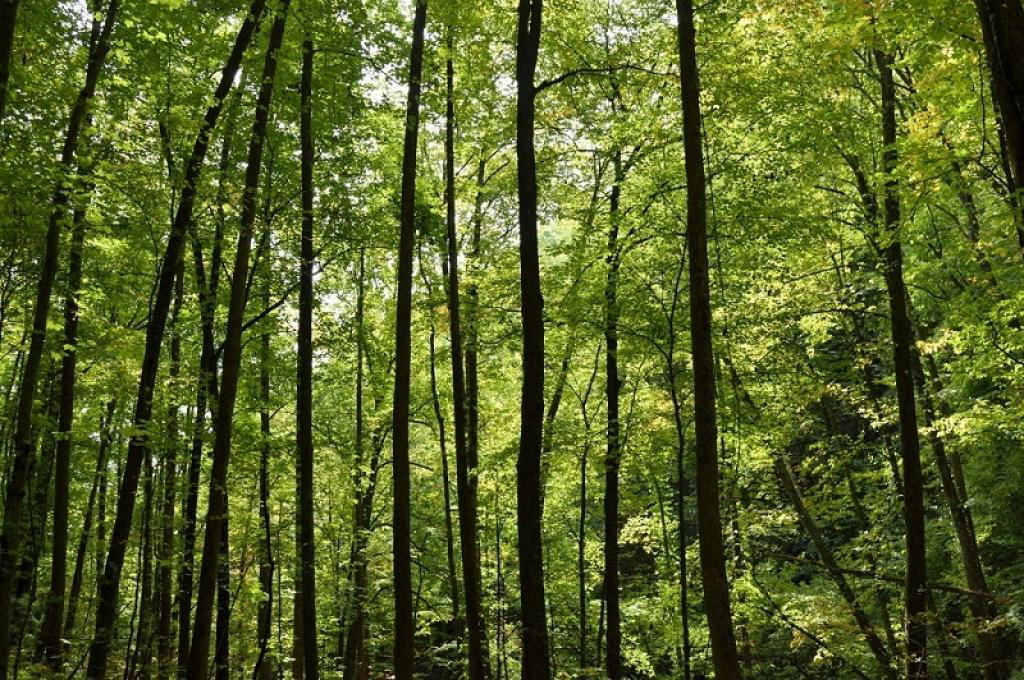

1/1 [==============================] - 0s 439ms/step
Forest fire


In [2]:
import cv2 
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import librosa
from tensorflow.keras.preprocessing import image
from keras.models import load_model
# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
cap = cv2.VideoCapture('/content/drive/MyDrive/ibm/no fire.jpg')
 
# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")
 
# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:
    x=image.img_to_array(frame)
    res=cv2.resize(x,dsize=(64,64),interpolation=cv2.INTER_CUBIC)
    #expand the image shape
    x=np.expand_dims(res,axis=0)
    model=load_model("/content/drive/MyDrive/ibm/Dataset/forest1.h5")
    cv2_imshow(frame)
    pred=model.predict(x)
    pred = int(pred[0][0])
    pred
    int(pred)
    if pred==0:
      print('Forest fire')
      break
    else:
      print("no danger")
      break
 
# When everything done, release the video capture object
cap.release()
 
# Closes all the frames
cv2.destroyAllWindows()

 

In [ ]:
pip install twilio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 29.0 MB/s 


In [ ]:
pip install pygobject

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from twilio.rest import Client
from playsound import playsound
if pred==0:
  print('Forest fire')
  account_sid='ACe23d3104e6d355111543395761f7371a'
  auth_token='48801591e5794a1fc8cdd69e928cf77f'
  client=Client(account_sid,auth_token)
  message=client.messages \
  .create(
      body='forest fire is detected,stay alert',
      #use twilio free number
      from_='+14254751445',
      #to number
      to='+919080336426')
  print(message.sid)
  print("Fire detected")
  print("SMS Sent!")
elif pred==1:
  print('No danger')


No danger
